<a href="https://colab.research.google.com/github/AI-KPI/DLBookNotes/blob/main/2.2 Multiplying Matrices and Vectors/2.2 Multiplying Matrices and Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (6, 4)

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

$$
\newcommand\bs[1]{\boldsymbol{#1}}
$$

<span class='notes'>
Цей вміст є частиною серії до Розділу 3 про ймовірність з [Книги про глибоке навчання](http://www.deeplearningbook.org/) Гудфеллоу, І., Бенджіо, Ю. та Корвіла, А. (2016). Вона спрямована на надання розуміння/малюнків/коду Python до математичних теорій і побудована на основі мого розуміння цих понять.
</span>

Ви можете знайти відповідний пост в моєму блозі [тут](https://hadrienj.github.io/posts/Probability-Mass-and-Density-Functions/).

# Вступ

Із задоволенням хочу представити наступну свою серію книг “Глибоке навчання” Goodfellow та ін. Це перша публікація/блокнот, зроблена з розділу 3 про Ймовірність. Для тих, хто вже знає про мої публікації [Розділ 2](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/) з лінійної алгебри, то структура та мета цього розділу подібна. Мета - зробити книгу доступнішою **для людей без глибоких знань в  математиці**. Для більш детальної інформації можна звернутись за посиланням: [вступна частина](https://towardsdatascience.com/boost-your-data-sciences-skills-learn-linear-algebra-2c30fdd008cf).

Я вважаю, що для того щоб було краще **інтуїтивно зрозуміло** математичні поняття необхідно використовувати код (в нашому випадку Python) і візуалізації. Структура слідує підрозділам книги, і її можна використовувати як додатковий зміст, наводячи приклади та деталі.

Ця перша частина стосується глав 3.1 - 3.3. Розділ 3.1 - вступ до ймовірності, який не містить технічних труднощів. Таким чином, ви можете прочитати його безпосередньо [тут](https://www.deeplearningbook.org/contents/prob.html). Глава 3.2 насправді має лише визначення, а тому головна частина- 3.3 описсує **функцію маси ймовірності** та **функцію щільності ймовірності**. Після його прочитання **випадкові величини** та їх розподіл ймовірностей (для **дискретних та неперервних змінних**) не будуть здаватись чимось таємничим 🏄.

Для того, щоб все це зрозуміти, ми також вивчимо кілька дуже корисних математичних інструментів:

🔧 **Дискретна та неперервна змінна**

🔧 **Похідна**

🔧 **Інтеграли**

🔧 **Площа під кривою**

Ці поняття є важливими для загального розуміння  науки про дані та машинного навчання.

# 3.2 Випадкові змінні

Метою ймовірності є боротьба з невизначеністю. Це дає способи описувати випадкові події. Випадкова змінна - це змінна, яка може приймати різні значеня залежно від результату випадкової події.  Можливі результати - це всі можливі значення які може приймати змінна. 

Якщо можливі результати  є скінченними (наприклад, 6 варіантів різних наслідків у випадку підкидання гральної кістки), то випадкову величину називають **дискретною**.

Якщо можливі результати є нескінченними (наприклад, вибір дійсного числа від $0$ до $1$ може дати нескінченну кількість значень), тоді випадкова величина називається **неперервною**.


Як і в книзі, ми будемо використовувати наступні позначення: мала літера в звичайному шрифті для випадкової величини: $\text{x}$.

### Приклад 1.

Скажімо, що змінна $\text{x}$ є випадковою величиною, що виражає результат кидка кубиків 🎲. Змінна може приймати значення 1, 2, 3, 4, 5 або 6. Це дискретна випадкова величина.

# 3.3 Розподіл ймовірності

Отже, випадкова величина може приймати кілька значень. Одна дуже важлива річ - це знати, чи деякі значення будуть зустрічатися частіше за інші. Опис ймовірності кожного можливого значення, яке може прийняти випадкова величина, називається її **розподілом ймовірностей**.

Розуміння ідей дискретної та неперервної змінної є дуже важливими, і ми вивчимо концепцію розподілу ймовірностей в обох випадках. Навіть якщо вони і схожі, існують деякі відмінності.

У будь-якому випадку розподіл ймовірностей випадкової величини $\text{x}$ описує ймовірність кожного результату (ймовірність 1 означає, що змінна завжди прийме це значення, і ймовірність 0, що вона ніколи не зустрінеться).Ця функція називається розподілом ймовірностей. Більш конкретно, це називається **функцією ймовірності** для дискретної змінної та **функцією щільності ймовірності** для неперервної змінної.


## 3.3.1 Дискретна змінна та Функція ймовірностей

**Функція ймовірності** - це функція, яка описує ймовірність, пов’язану із випадковою змінною $\text{x}$. Ця функція називається $P(\text{x})$ або $P(\text{x} = x)$, щоб уникнути плутанини. $P(\text{x} = x)$ відповідає ймовірності того, що випадкова величина $\text{x}$ прийме значення $x$ (зверніть увагу на різне написання).


### Приклад 2.

<img src="images/all_dice.png" width="400" alt="Експеримент з  гральними кістками, що ілюструє дискретну випадкову величину та функцію ймовірності" title="Експеримент з  гральними кістками, що ілюструє дискретну випадкову величину та функцію ймовірності">
<em>Експеримент з гральними кістками, що ілюструє дискретну випадкову величину та функцію ймовірності</em>

Давайте кинему гральну кістку нескінченну кількість разів і подивимось на пропорцію випадання 1, пропорцію випадання 2 і т.д.

$\text {x}$ ми називаємо випадковою величиною, яка відповідає результату кидка кубиків. Таким чином, випадкова величина $\text {x}$ може приймати лише такі дискретні значення: 1, 2, 3, 4, 5 або 6. Таким чином, це **дискретна випадкова величина**.

У нашому прикладі він описує ймовірність отримати 1, ймовірність отримати 2 і так далі. У випадку експерименту з катанням кубиків, ми маємо однакову ймовірність отримати кожне значення (якщо ми вважаємо, що кубик ідеальний). Це означає, що ми можемо написати:

$$
\begin{align*}
P(\text{x}=1)&=P(\text{x}=2)\\\\
&=P(\text{x}=3)\\\\
&=P(\text{x}=4)\\\\
&=P(\text{x}=5)\\\\
&=P(\text{x}=6)
\end{align*}
$$

Тепер, як ми можемо обчислити ймовірності $P(\text{x}=1)$, $P(\text{x}=2)$ і т.д.? Оскільки ми маємо 6 можливих результатів, і вони є однаково ймовірними, ми маємо:

$$
\begin{align*}
P(\text{x}=1)&=P(\text{x}=2)\\\\
&=P(\text{x}=3)\\\\
&=P(\text{x}=4)\\\\
&=P(\text{x}=5)\\\\
&=P(\text{x}=6)\\\\
&=\frac{1}{6}
\end{align*}
$$

До речі, цей розподіл показує однакову ймовірність для кожного значення: тому він називається **рівномірним розподілом**.

Функція  ймовірності буде виглядати приблизно так:

<img src="images/mass.png" width="300" alt="Функція ймовірності експерименту з кістками" title="Функція ймовірності експерименту з кістками">
<em>Probability mass function of the dice experiment</em>

Вісь y дає вірогідність, а вісь x результат.

Давайте відтворимо цей перший приклад у коді, щоб переконатися, і щоб все було зрозуміло:

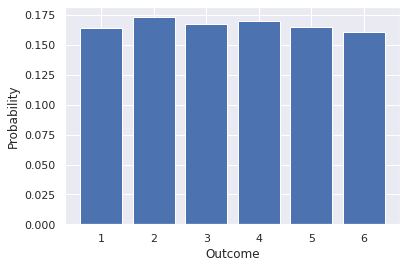

In [4]:
num_throws = 10000
outcomes = np.zeros(num_throws)
for i in range(num_throws):
    # let's roll the die
    outcome = np.random.choice(['1', '2', '3', '4', '5', '6'])
    outcomes[i] = outcome

    
val, cnt = np.unique(outcomes, return_counts=True)
prop = cnt / len(outcomes)

# Now that we have rolled our die 10000 times, let's plot the results
plt.bar(val, prop)
plt.ylabel("Probability")
plt.xlabel("Outcome")
plt.show()
plt.close()

Я створив масив, заповнений  $0$ за допомоги функції `zeros()`. При кожному кидку я вибирав значення серед 6 варіантів. Потім я використав функцію `unique()` із параметром `return_counts` встановленим на значення `True` щоб отримати кількість кожного  результату. Я склав пропорцію для кожного можливого значення і намалював графік.

Ми бачимо, що розподіл виглядає як рівномірний розподіл і що кожен результат має ймовірність приблизно $\frac{1}{6}$ ($\approx 0.17$).

### Спільний розподіл ймовірності

А тепер давайте подивимося, що станеться, якщо ми кинемо дві кубики. Для кожного кубика результати пов'язані з певною ймовірністю.  Нам потрібні дві випадкові величини для опису гри, скажімо так $\text{x}$ відповідає першому кубику $\text{y}$ відповідає другому. У нас також є дві функції ймовірностей, пов’язані із випадковими змінними: $P(\text{x})$ і $P(\text{y})$. Тут можливі значення випадкових величин (1, 2, 3, 4, 5 або 6) і функції ймовірності у нашому випадку однакові для обох кубиків, однак це не завжди повинно бути так.

**Спільний розподіл ймовірностей** корисний у тих випадках, коли нас цікавить ймовірність того, що $\text{x}$ приймає певне значення, тоді як $\text{y}$ приймає інше конкретне значення. Наприклад, якою буде ймовірність отримати 1 з першим кубиком і 2 з другим кубиком? Імовірності, що відповідають кожній парі значень, записуються $P(\text{x}=x, \text{y}=y)$ або $P(\text{x}, \text{y})$. Це те, що ми називаємо **спільною ймовірністю**.

### Приклад 3.

Наприклад, давайте обчислимо ймовірність мати 1 з першими кубиками і 2 з другим:

$$
P(\text{x}=1, \text{y}=2) = \frac{1}{6} \times \frac{1}{6} = \frac{1}{36} \approx 0.028
$$


### Властивості функції ймовірності

Функція є функцією ймовірності якщо:
$$
\forall x \in \text{x}, 0 \leq P(x) \leq 1
$$

Символ $\forall$ значить "для всіх". Це означає, що для кожного можливого значення $x$ в діапазоні $\text{x}$ (у прикладі експерименту з киданням кубиків усі можливі значення були 1, 2, 3, 4, 5 і 6),ймовірність того, що результат відповідає цьому значенню, лежить у діапазоні від 0 до 1. Імовірність 0 означає, що подія неможлива, а ймовірність 1 означає, що ви можете бути впевнені, що результат буде відповідати цьому значенню.

У прикладі кубика ймовірність кожного можливого значення дорівнює $\frac{1}{6}$ , що між 0 і 1. Ця властивість виконується.

$$
\sum\limits_{x \in \text{x}} P(x) = 1
$$

Це означає, що сума ймовірностей, пов'язаних з кожним можливим значенням, дорівнює 1.

На прикладі експерименту з кістками ми можемо побачити, що існує 6 можливих результатів, кожен із яких має ймовірність $\frac{1}{6}$ даючи загалом $\frac{1}{6} \times 6 = 1$. Ця властивість виконується.

## 3.3.2  Неперервна змінна та Функція щільності ймовірності

Деякі змінні не є дискретними. Вони можуть приймати нескінченну кількість значень у певному діапазоні. Але нам все-таки потрібно описати ймовірність, пов’язану з результатами. Еквівалент функції ймовірності для неперервної змінної називається **функцією щільності ймовірності**.

У випадку функції імовірнісної ми побачили, що вісь ординат відповідає ймовірністі. Наприклад, у графіку, який ми створили за допомогою Python, ймовірність отримати $1$ дорівнювала $\frac{1}{6} \approx 0.16$ (перевірте на графіку вище). $\frac{1}{6}$, оскільки це ймовірність отримати один з 6 можливих випадків.

Однак ми не можемо зробити це для неперервних змінних, оскільки загальна кількість можливостей нескінченна. Наприклад, якщо ми намалюємо число від 0 до 1, ми отримаємо нескінченну кількість можливих результатів (наприклад, 0,320502304 ...). У наведеному вище прикладі ми мали 6 можливих результатів, що призвело до ймовірностей близькоd $\frac{1}{6}$. Тепер у нас кожна ймовірність дорівнює $\frac{1}{+\infty} \approx 0$. Така функція була б не дуже корисною.

З цієї причини вісь ординат функції щільності ймовірності не представляє значень ймовірності. Щоб отримати ймовірність, нам потрібно обчислити **площу під кривою** (нижче ми побачимо деякі подробиці про площу під кривою). ЇЇ перевага полягає в тому, що це призводить до ймовірностей відповідно до певного діапазону (на осі х): площа під кривою збільшується, якщо діапазон збільшується. Давайте подивимося кілька прикладів, щоб це все пояснити.

### Приклад 4.

Нехай, у нас є випадкова величина $\text{x}$ яка може приймати значення від 0 до 1. Ось її функція щільності ймовірності:

<img src="images/probability-density-function.png" width="300" alt="Функція щільності ймовірності" title="Функція щільності ймовірності (pdf)">
<em>Функція щільності ймовірності</em>

Ми бачимо, що $0$ здається неможливим (ймовірність близько 0), а також $1$. Пік графіку біля $0.3$ означає що найбільш вірогідний результат можна отримати біля цього значення  .

Знайти ймовірності за функцією щільності ймовірностей між певним діапазоном значень можна за допомогою обчислення площі під кривою для цього діапазону. Наприклад, ймовірність отримати значення від  $0.5$ до $0.6$ відповідає наступній області:

<img src="images/probability-density-function-area-under-the-curve-1.png" width="300" alt="Функція щільності ймовірності і площа під кривою, що відповідає діапазону 0,5-0,6" title="Функція щільності ймовірності (pdf) і площа під кривою">
<em>Функція щільності ймовірності і площа під кривою, що відповідає діапазону 0,5-0,6.</em>

Ми легко бачимо, що якщо ми збільшимо діапазон, то зросте і ймовірність (площа під кривою). Наприклад, для діапазону 0,5-0,7:

<img src="images/probability-density-function-area-under-the-curve-2.png" width="300" alt="Функція щільності ймовірності і площа під кривою, що відповідає діапазону 0,5-0,7" title="Функція щільності ймовірності (pdf) і площа під кривою">
<em>Функція щільності ймовірності і площа під кривою, що відповідає діапазону 0,5-0,7.</em>

Через мить ми побачимо, як обчислити площу під кривою та отримати ймовірність, пов’язану з певним діапазоном.

### Властивості функції щільності ймовірності

Ці відмінності між функціями (ймовірності та функцією щільності ймовірності) призводять до інших властивостей функції щільності ймовірності:

1. $\forall x \in \text{x}, p(x) \geq  0$.

У цьому випадку, $p(x)$ не обов'язково менше 1, оскільки **воно не відповідає ймовірності** (сама ймовірність все одно повинна бути між $0$ і $1$).

### Приклад 5.

Наприклад, скажімо, у нас є безперервна випадкова величина, яка може приймати значення від $0$ до $0.5$. Ця змінна описується рівномірним розподілом, тому ми матимемо таку функцію розподілу ймовірностей:

<img src="images/area_under_curve_more_1.png" width="150" alt="Ілюстрація функції щільності ймовірності (рівномірний розподіл) зі значенням y більше 1" title="Функція щільності ймовірності (pdf) із значеннями y більше 1">
<em>Функція щільності ймовірності (рівномірний розподіл). Площа під кривою дорівнює 1 ($2 \times 0.5$) а значення y перевищують 1.</em>

Ми бачимо, що значення y перевищують $1$. Імовірність дається площею під кривою, і, отже, вона також залежить від осі х.

🤨 Якщо ви хочете побачити це самостійно, ми відтворимо цей приклад з допомогою Python. Для цього ми створимо випадкову величину $\text{x}$, що може приймати значення між $0$ і $0.5$ випадковим чином. Рівномірний розподіл буде отриманий завдяки функції  `random.uniform()`. Параметрами цієї функції є найменше значення (включно), найвище значення (не включно) та кількість зразків. Тож `np.random.uniform(0, 0.5, 10000)` створить 10000 випадково вибраних значень які $\geq 0$ і $\lt 0.5$.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


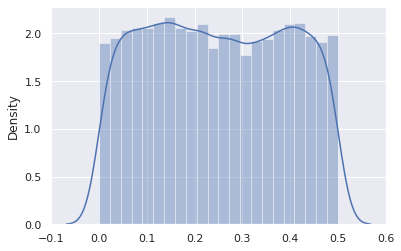

In [5]:
x = np.random.uniform(0, 0.5, 10000)

sns.distplot(x)
plt.show()

Чудово! 🏄🏽‍♀️

Ми бачимо, що фігура виглядає так, як я намалював вище із значеннями осі y близько 2 для всіх $x$ мід $0$ і $0.5$.

Однак дещо може викликати підозру в цьому графіку. Ми говорили про безперервну змінну, і тут ми представили розподіл за допомогою стовпчиків. Пояснення те саме, що і раніше: нам потрібно дискретизувати функцію, щоб підрахувати кількість результатів у кожному інтервалі. Власне, кількість інтервалів є параметром функції `distplot()`. Давайте спробуємо:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


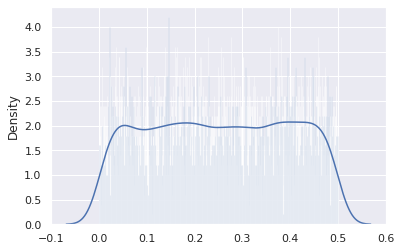

In [6]:
x = np.random.uniform(0, 0.5, 10000)

sns.distplot(x, bins=1000)
plt.show()

Ми бачимо, що ми все ще поруч з $2$ але різниця більша, ніж раніше (стовпчики можуть різнитись від 1 до 4, чого не було в останньому графіку). Є ідеї чому? 🤔

💡Це тому, що, оскільки ми взяли більше стовпців, менша кількість значень була в кожному стовпці, що призвело до менш точної оцінки. Якщо ця гіпотеза відповідає дійсності, ми могли б зменшити мінливість, збільшивши кількість зразків. Спробуємо:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


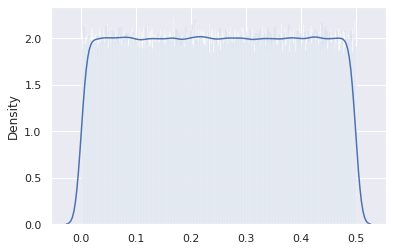

In [7]:
x = np.random.uniform(0, 0.5, 1000000)

sns.distplot(x, bins=1000)
plt.show()

Чудово! 🤸🏼‍♂️

Тепер ми можемо перейти до другої властивості!

$$
\int p(x)dx = 1
$$

Для функції ймовірностей, ми побачили, що сума ймовірностей повинна дорівнювати $1$. Це не стосується функцій щільності ймовірності, оскільки ймовірність відповідає площі під кривою, а не безпосередньо до значень $y$. Однак це означає, що **площа під кривою повинна дорівнювати 1**.

В останньому прикладі ми побачили, що площа насправді дорівнює 1. Її можна легко отримати та візуалізувати через квадратну форму рівномірного розподілу. Таким чином, можна помножити висоту на ширину: $2 \times 0.5 = 1$.

Однак у багатьох випадках форма не квадратна, а нам все одно потрібно обчислити площу під кривою. Давайте подивимось, як це зробити!

### 🔧 Площа під кривою

Площа під кривою функції для певного діапазону значень може бути обчислена за допомогою **інтегралу** функції. Ми побачимо, що обчислення інтеграла функції протилежне обчисленню похідної. Це означає, що якщо ви отримаєте функцію  $f(x)$  і обчислите інтеграл результуючої функції  $f'(x)$ ви отримаєте $f(x)$ назад.😮

Похідна в точці функції дає свою **швидкість зміни**. Який зв’язок між функцією, що описує швидкість зміни іншої функції (похідної), і площею під кривою 🤔?

Почнемо з пункту про похідну! І тоді, з наступним графічним прикладом, все буде зрозуміло. 🔮


### Приклад 6.

Ми хочемо промоделювати швидкість транспортного засобу. Скажімо, що функція $f(x) = x^2$ визначає швидкість (вісь у)  функції часу.

Спочатку ми побудуємо графік функції $f(x)=x^2$ щоб побачити її форму:

(-1.0, 10.0)

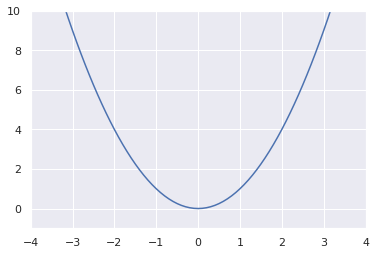

In [9]:
x = np.arange(-10, 11, 0.1)
fx = x ** 2

plt.plot(x, fx)
plt.xlim(-4, 4)
plt.ylim(-1, 10)

Це парабола! Вона показує, що швидкість спочатку повільно зростає, однак зростає більше і більше протягом всього часу.

Я створив змінну $x$ (з функцією `arange()` з бібліотеки Numpy) яка містить усі точки осі x. Отже, це просто всі значення від -10 до 10 з кроком  $0.1$. Давайте подивимось перші 10 значень.

In [10]:
x[:10]

array([-10. ,  -9.9,  -9.8,  -9.7,  -9.6,  -9.5,  -9.4,  -9.3,  -9.2,
        -9.1])

Ось [Документація](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html) для функції `arange()`.

У нашому прикладі функція визначає швидкість транспортного засобу в залежності від часу, тому не має сенсу мати негативні значення. Візьмемо лише позитивну частину осі х, щоб уникнути негативного часу (ми скажемо, що 0 - це час початку експерименту).

(-1.0, 10.0)

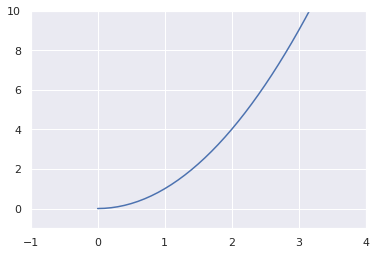

In [11]:
x = np.arange(0, 11, 0.1)
fx = x ** 2

plt.plot(x, fx)
plt.xlim(-1, 4)
plt.ylim(-1, 10)

Гаразд, це вже краще!

Похідною цієї функції є $f'(x)=2x$. Щоб отримати більше інформації про правила похідних, дивіться [тут](https://www.mathsisfun.com/calculus/derivatives-rules.html).

Ось графік для $f'(x)$:

(0.0, 10.0)

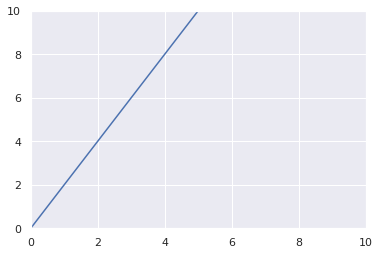

In [12]:
x = np.arange(-10, 11)
fx = 2 * x

plt.plot(x, fx)
plt.xlim(0, 10)
plt.ylim(0, 10)

### 🔧 Похідна

Похідна показує прискорення. $f(x)$ описує швидкість транспортного засобу у залежності від часу, а похідна $f'(x)$ показує  **швидкість зміни** швидкості у залежності від часу, тобто прискорення.

Ми бачимо, що прискорення транспортного засобу лінійно збільшується з часом. Похідна повідомляє нам, що швидкість зміни швидкості автомобіля становить $2x$. Наприклад, коли $x=0$, швидкість зміни дорівнює $2\times0=0$, швидкість не змінюється. Коли $x=3$, швидкість зміни становить $2\times3=6$. Це означає, що в цей момент швидкість збільшується на $6$ коли час збільшується на $1$.

Підводячи підсумок, похідна функції дає швидкість її зміни. У нашому прикладі швидкість змін була іншою функцією ($f'(x) = 2x$) але це може бути константа (швидкість зміни завжди однакова, напр. $f'(x)=2$) або квадратична функція, наприклад (напр. $f'(x) = x^3$).

### 🔧 Інтеграли

Вміти обчислювати похідні дуже корисно, але чи можна зробити зворотне: перехід від швидкості зміни до самої зміни 😮. Ух, круто! Відповідь дається інтегралом функції.

Інтеграл від $f'(x)$ дає нам $f(x)$ назад. Позначення таке:


$$
\int f'(x) dx = f(x)
$$

Це означає, що ми беремо $f'(x)$ щоб повернути $f(x)$. Позначення $dx$ означає, що ми інтегруємо по $x$, тобто, ми підсумовуємо фрагменти по $y$ (див. [Тут](https://www.mathsisfun.com/calculus/integration-introduction.html)).

Якщо взяти ще раз останній приклад, який ми маємо:

$$
\int 2x dx = x^2 + c
$$

Ми бачимо, що є різниця: додавання константи $c$. Це тому, що нескінченна кількість функцій могла дати похідну $2x$ (наприклад $x^2 + 1$ або $x^2 + 294$...). Ми втрачаємо деяку частину інформації і не можемо її відновити.

А тепер, графічне пояснення (Я це люблю 💛): ми бачили, що $2x$ - це функція, що описує швидкість зміни (нахил) функції $x^2$. Тепер, якщо ми підемо від $f'(x)$ до $f(x)$ ми можемо бачити, що площа під кривою $f'(x)$ відповідає $f(x)$:

<img src="images/area-under-curve-derivative.png" width="600" alt="Ілюстрація площі під кривою похідної: вона відповідає вихідній функції" title="Площа під кривою похідної">
<em>Площа під кривою $f'(x)$ відповідає $f(x)$. Це показує, що інтеграл і похідна є протилежними операціями.</em>

Цей графік показує функцію  $f'(x)=2x$  і ми бачимо, що площа під кривою збільшується експоненціально. Ця область представлена для різних діапазонів ([0-0], [0-1], [0-2], [0-3]).  Ми можемо обчислити площу під кривою (використовуючи теорему Піфагора і поділивши на 2, оскільки площі є половинами квадратів) і знайти наступні значення: 0, 1, 4, 9... Це відповідає вихідній функції $f(x)=x^2$! 🎺

## Підсумок

Підводячи підсумок, ми побачили, що таке випадкова величина і як розподіл ймовірностей може бути виражений для дискретної (функція ймовірності) та неперервної змінної (функція щільності ймовірності). Ми також вивчили концепцію спільного розподілу ймовірностей та математичних інструментів, таких як похідні та інтеграли.

Тепер у вас є всі інструменти, щоб глибше зануритися у ймовірність. Наступна частина буде про глави 3.4 - 3.8. Ми побачимо те, що ми назвали граничною та умовною ймовірністю, правило ланцюга та концепцію незалежності.

Я сподіваюся, що це допомогло вам отримати краще розуміння у всьому цьому! Не соромтеся зв’язуватися зі мною щодо будь-якого питань/побажань/виправлень! 😀


# Джерело

[Probability Mass and Density](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/3.1-3.3%20Probability%20Mass%20and%20Density%20Functions/3.1-3.3%20Probability%20Mass%20and%20Density%20Functions.ipynb)

Переклад: Андрійчук Дмитро, студент ІО-02мп, 2020 рік